# PyTorch and CIFAR10 data analysis

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [63]:
sns.set_theme(style='white', palette='pastel')

In [64]:
DATA_DIRS = {
    'all': os.path.join('csv', 'fast-nogpu', '2021-11-23-12-06-32-all'),
    'core 1, 3 - no hyper': os.path.join('csv', 'fast-nogpu', '2021-11-23-13-54-09-core1,3-nohyper'),
    'core 1 - hyper': os.path.join('csv', 'fast-nogpu', '2021-11-23-17-00-16-core1-hyper'),
    'core 1 - no hyper': os.path.join('csv', 'fast-nogpu', '2021-11-24-09-41-13-core1-nohyper'),
}

In [65]:
dfs = {}

for name, data_dir in DATA_DIRS.items():
    run_filenames = (
        {int(file.name.split('-')[1][:-4]): file.name
         for file in sorted(list(os.scandir(data_dir)), key=lambda x: x.name)
         if file.is_file() and not file.name.startswith('.')}
    )

    df = pd.concat(
        [pd.concat({num: pd.read_csv(os.path.join(data_dir, filename), index_col='epoch')}, names=['run'])
         for num, filename in list(run_filenames.items())[:]]
    )
    
    dfs[name] = df
    
df = pd.concat(dfs)
df.index.set_names(['setup', 'run', 'epoch'], inplace=True)

## Preview of the dataframe

In [66]:
df

,,,duration,train acc,valid acc,package_0 energy,package_1 energy,dram_0 energy,dram_1 energy,package_0 power,package_1 power,dram_0 power,dram_1 power
setup,run,epoch,,,,,,,,,,,
all,0,1,164.119781,0.406351,0.5299,20451.754407,20436.030752,2086.460632,2281.221493,124.614805,124.518999,12.713036,13.899735
"core 1, 3 - no hyper",0,1,537.901641,0.404136,0.4721,26415.843202,41386.642157,2521.688763,5216.202164,49.109059,76.940911,4.688011,9.697316
core 1 - hyper,0,1,997.403426,0.419298,0.5478,48936.208768,65608.037304,4667.494469,9200.949218,49.063606,65.778837,4.679646,9.224902
core 1 - no hyper,0,1,1083.765024,0.407639,0.5850,52904.081301,68367.543606,5027.861994,9895.495029,48.815085,63.083364,4.639255,9.130665


## Total energy consumption

In [107]:
df_sum_energy_setup = df.filter(regex='energy').sum(axis=1).groupby(level=['setup', 'run']).sum().unstack(level='setup')

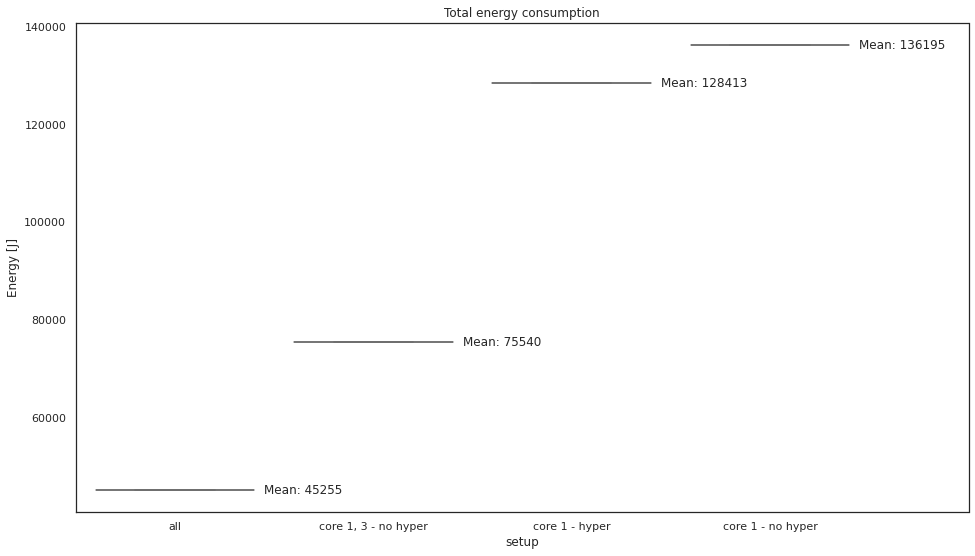

In [108]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.boxplot(data=df_sum_energy_setup, ax=ax)
ax.set_title('Total energy consumption')
ax.set_ylabel('Energy [J]')
for x_pos, energy in zip(ax.get_xticks(), df_sum_energy_setup.mean()):
    ax.text(x_pos+0.45, energy, f'Mean: {round(energy)}', horizontalalignment='left', verticalalignment='center')
ax.set_xlim(ax.get_xticks()[0]-0.5, ax.get_xticks()[-1]+1);

## Package power consumption

In [109]:
df_sum_package_energy_setup = df.filter(regex='(?=.*package_)(?=.*power)').sum(axis=1).groupby(level=['setup', 'run']).sum().unstack(level='setup')

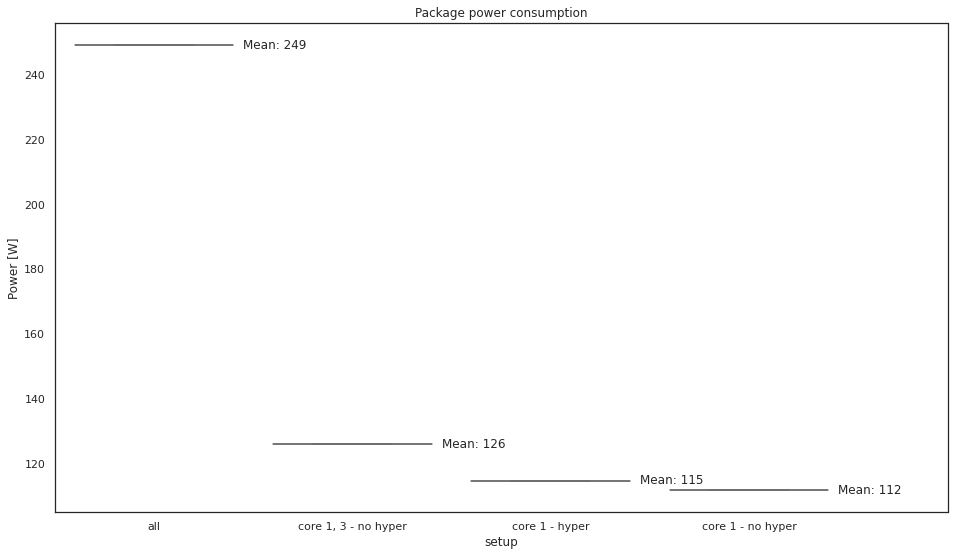

In [110]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.boxplot(data=df_sum_package_energy_setup, ax=ax)
ax.set_title('Package power consumption')
ax.set_ylabel('Power [W]')
for x_pos, energy in zip(ax.get_xticks(), df_sum_package_energy_setup.mean()):
    ax.text(x_pos+0.45, energy, f'Mean: {round(energy)}', horizontalalignment='left', verticalalignment='center')
ax.set_xlim(ax.get_xticks()[0]-0.5, ax.get_xticks()[-1]+1);